In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt # visualization

data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [2]:
data.head() #view the first five rows of the pandas dataframe

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = np.array(data) #put pandas dataframe into numpy array
m, n = data.shape #m is amount of rows, n is amount of features + 1
np.random.shuffle(data) #randomly rearrange training examples

# Split data into training and validation datasets

data_validate = data[0:1000].T # validation set
Y_validate = data_validate[0] # labels
X_validate = data_validate[1:n] # features
X_validate = X_validate / 255 # let pixel brightness be a scale from 0-1 rather than 0-255

data_train = data[1000:m].T # training set
Y_train = data_train[0] # labels
X_train = data_train[1:n] #features
X_train = X_train / 255 # let pixel brightness be a scale from 0-1 rather than 0-255
_,m_train = X_train.shape

In [4]:
X_train[:, 0].shape # should output how many pixels in each image


(784,)

In [5]:
Y_train #the classification (0-9) for each training example

array([3, 0, 4, ..., 8, 9, 5])

In [6]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

#define ReLU (recitified linear unit) activation function
def ReLU(Z):
    return np.maximum(0, Z)

#define softmax output layer function
def softmax(Z):
    output_layer = np.exp(Z) / sum(np.exp(Z))
    return output_layer # returns output layer of probabilties (0-1)
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1 # weighted sum of input layer
    A1 = ReLU(Z1) # use ReLU activation function on weighted sum of input layer to get first hidden layer
    Z2 = W2.dot(A1) + b2 # weighted sum of first hidden layer layer
    A2 = softmax(Z2) # use softmax activation function on weighted sum of first hidden layer to get output layer of probabilities
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0 #if Z > 0, derivative will be derivative of x (1 or TRUE), if Z <= 0, derivative will be derivative of 0 (0 or FALSE)

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1)) # Creates matrix of zeros, with dimensions m (number of examples) and n (possible output classes)
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [7]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    #print(predictions, Y)
    return np.sum(predictions == Y) / Y.size
    
def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2

In [8]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 5000, 0.2)

Iteration:  0
Accuracy:  0.065
Iteration:  10
Accuracy:  0.3338536585365854
Iteration:  20
Accuracy:  0.4608536585365854
Iteration:  30
Accuracy:  0.5496341463414635
Iteration:  40
Accuracy:  0.6123658536585366
Iteration:  50
Accuracy:  0.6570487804878049
Iteration:  60
Accuracy:  0.6878048780487804
Iteration:  70
Accuracy:  0.7116829268292683
Iteration:  80
Accuracy:  0.7301951219512195
Iteration:  90
Accuracy:  0.7066585365853658
Iteration:  100
Accuracy:  0.7305853658536585
Iteration:  110
Accuracy:  0.7518048780487805
Iteration:  120
Accuracy:  0.7651463414634146
Iteration:  130
Accuracy:  0.7765365853658537
Iteration:  140
Accuracy:  0.7861707317073171
Iteration:  150
Accuracy:  0.7945853658536586
Iteration:  160
Accuracy:  0.8020975609756098
Iteration:  170
Accuracy:  0.8091951219512196
Iteration:  180
Accuracy:  0.8156585365853658
Iteration:  190
Accuracy:  0.8214146341463414
Iteration:  200
Accuracy:  0.8262682926829268
Iteration:  210
Accuracy:  0.8299512195121951
Iteration:  

# Now Let's See how the model does on the validation set

In [9]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_validate[:, index, None]
    prediction = make_predictions(X_validate[:, index, None], W1, b1, W2, b2)
    label = Y_validate[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

In [10]:
validate_predictions = make_predictions(X_validate, W1, b1, W2, b2)
print("Accuracy: ", 100 * get_accuracy(validate_predictions, Y_validate), "%")

Accuracy:  94.39999999999999 %


### Let's look at some examples of how it does on the validation set:

Prediction:  [5]
Label:  5


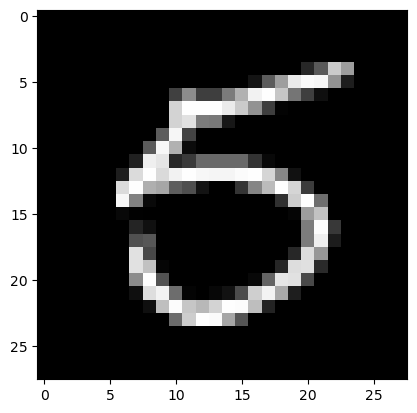

Prediction:  [7]
Label:  7


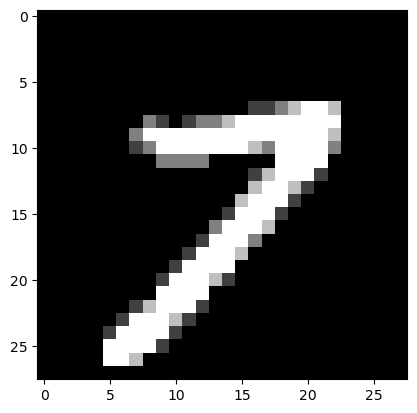

Prediction:  [6]
Label:  6


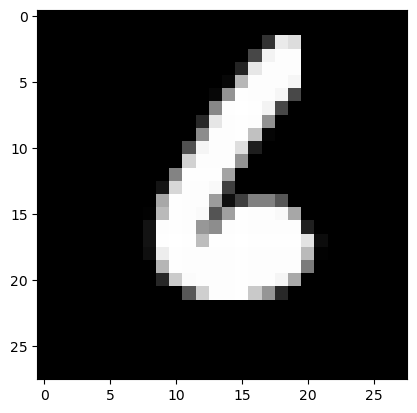

Prediction:  [9]
Label:  9


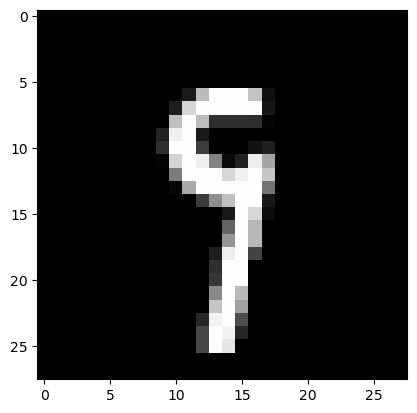

Prediction:  [9]
Label:  9


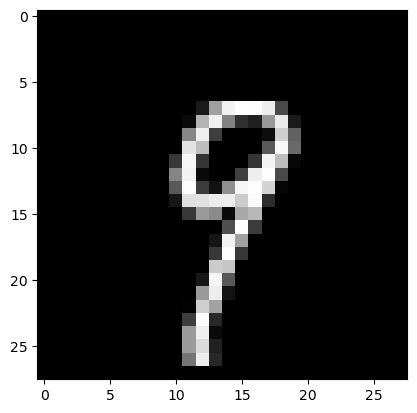

Prediction:  [4]
Label:  4


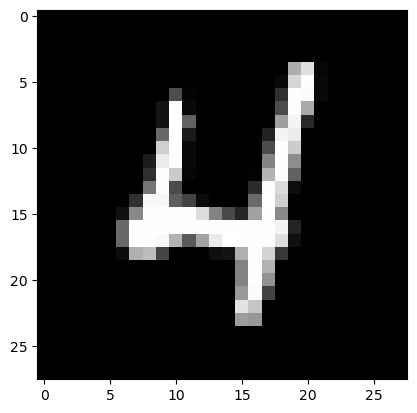

Prediction:  [1]
Label:  1


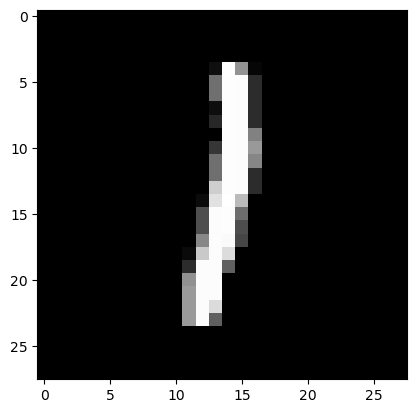

Prediction:  [4]
Label:  4


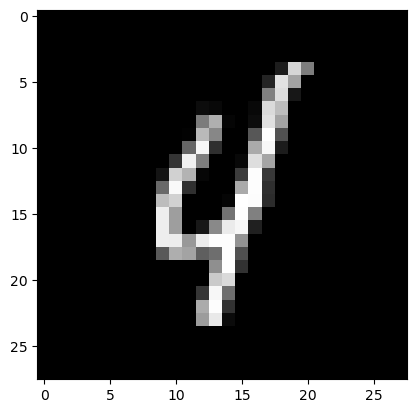

Prediction:  [7]
Label:  7


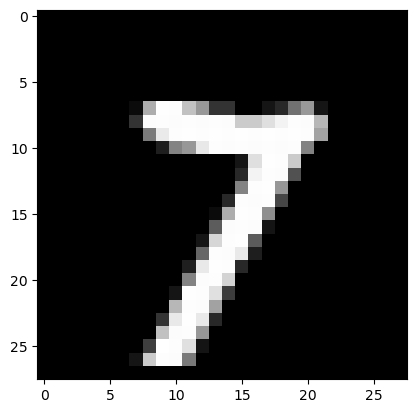

Prediction:  [2]
Label:  2


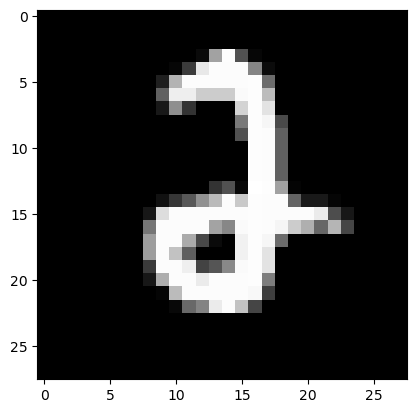

Prediction:  [8]
Label:  8


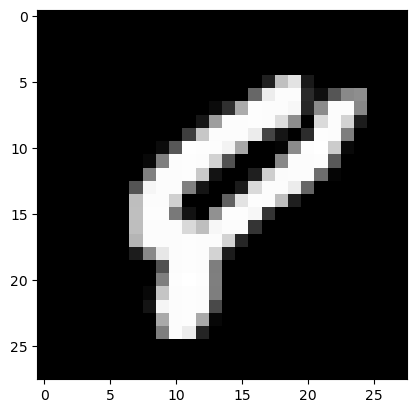

Prediction:  [6]
Label:  6


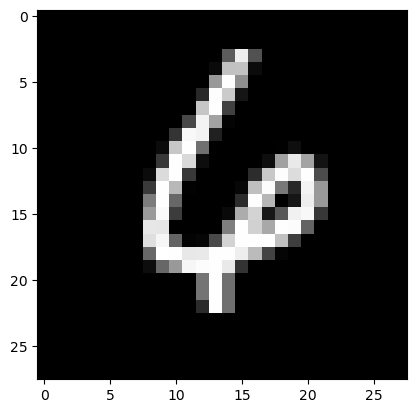

Prediction:  [5]
Label:  5


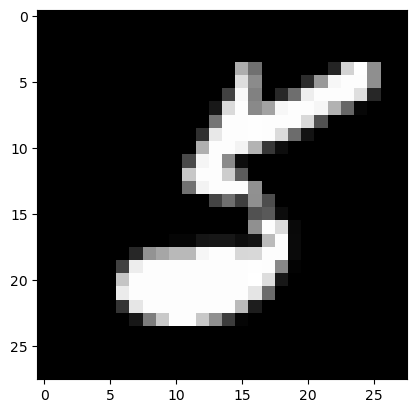

Prediction:  [8]
Label:  8


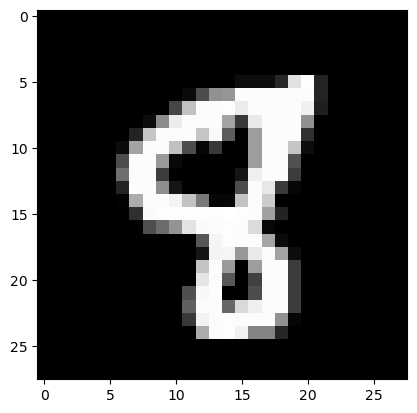

Prediction:  [6]
Label:  6


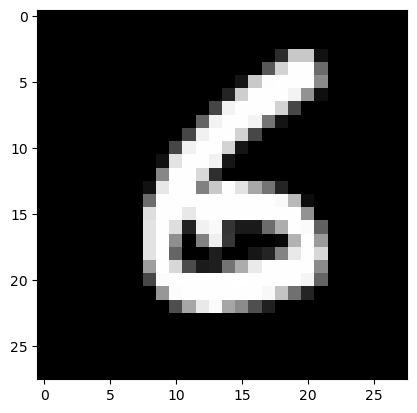

Prediction:  [5]
Label:  5


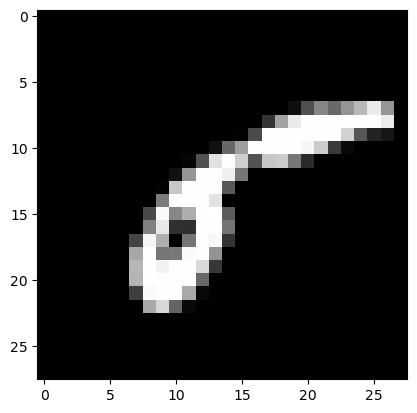

Prediction:  [6]
Label:  6


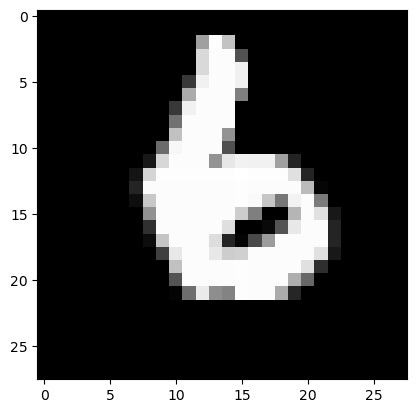

Prediction:  [7]
Label:  7


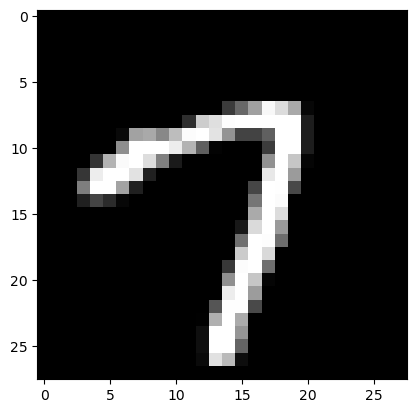

Prediction:  [5]
Label:  5


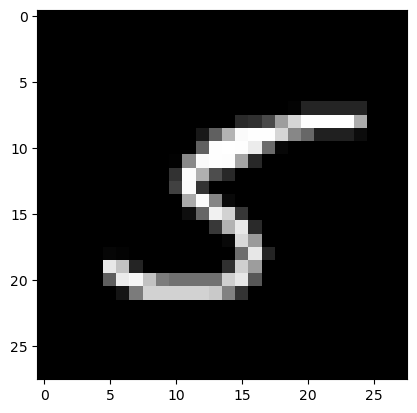

Prediction:  [4]
Label:  4


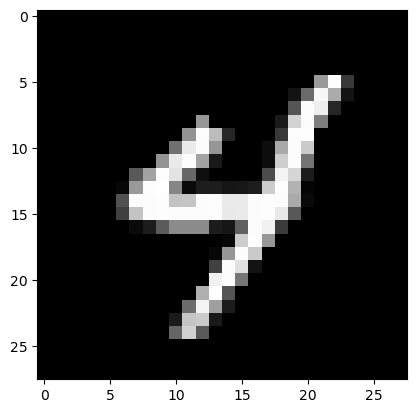

In [11]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)
test_prediction(4, W1, b1, W2, b2)
test_prediction(5, W1, b1, W2, b2)
test_prediction(6, W1, b1, W2, b2)
test_prediction(7, W1, b1, W2, b2)
test_prediction(8, W1, b1, W2, b2)
test_prediction(9, W1, b1, W2, b2)
test_prediction(10, W1, b1, W2, b2)
test_prediction(11, W1, b1, W2, b2)
test_prediction(12, W1, b1, W2, b2)
test_prediction(13, W1, b1, W2, b2)
test_prediction(14, W1, b1, W2, b2)
test_prediction(15, W1, b1, W2, b2)
test_prediction(16, W1, b1, W2, b2)
test_prediction(17, W1, b1, W2, b2)
test_prediction(18, W1, b1, W2, b2)
test_prediction(19, W1, b1, W2, b2)